# Lab 03 - Fuzzy operations

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this structure when you will do the exercises.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Fuzzy operations

Basic operations in fuzzy logic / sets are:
- AND: Conjunction / Intersection
- OR:  Disjunction / Union
- NOT: Negation / Complement

Let's explore some existing operators for these operations. 

## Example fuzzy sets

In [2]:
!pygmentize fuzzy_systems/core/membership_functions/trap_mf.py

from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF


class TrapMF(LinPWMF):
    """
    Assumptions:
    - mf values are bound to [0, 1]

    This class is more an example of how you can derive LinPWMF
    """

    def __init__(self, p0, p1, p2, p3=None, n_points=50):
        """
        Create a trapezoidal mf if p0,p1,p2,p3 are given.
        Otherwise, if p3 is missing, create a triangular mf
        """
        args = [p0, 0], [p1, 1], [p2, 1], [p3, 0]

        if p3 is None:
            args = [p0, 0], [p1, 1], [p1, 1], [p2, 0]

        super().__init__(*args, n_points=n_points)


Here we define two membership functions that we will use to apply fuzzy operators

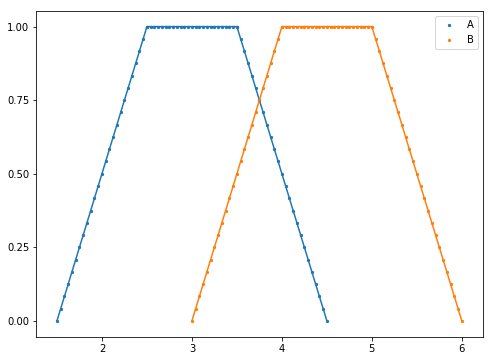

In [3]:
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.view.mf_viewer import MembershipFunctionViewer

mfA = TrapMF(1.5, 2.5, 3.5, 4.5, n_points=100)
mfB = TrapMF(3, 4, 5, 6, n_points=100)

fig, ax = plt.subplots(figsize=(8, 6))

MembershipFunctionViewer(mfA, ax=ax, label="A")
MembershipFunctionViewer(mfB, ax=ax, label="B")

plt.legend()
plt.show()

## Fuzzy AND

The fuzzy operator AND takes two MF and apply the AND operator i.e. $mf_C = mf_A \land mf_B$. The result is also a MF.

However there are multiple ways to implement the AND condition. The most common are the minimum, product and the bounded product. Below you will see examples of these implementations.

In [4]:
in_values_min = np.minimum(mfA.in_values.min(), mfB.in_values.min())
in_values_max = np.maximum(mfA.in_values.max(), mfB.in_values.max())
in_values = np.linspace(in_values_min, in_values_max, len(mfA.in_values))

In [5]:
mfA_fuzzified = mfA.fuzzify(in_values)
mfB_fuzzified = mfB.fuzzify(in_values)

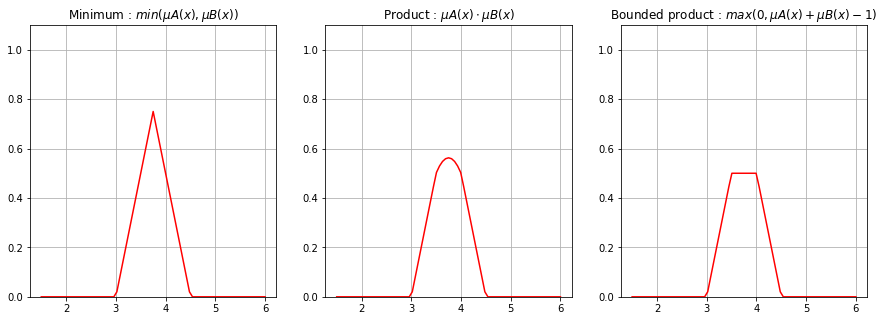

In [6]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

axarr[0].plot(in_values, np.minimum(mfA_fuzzified, mfB_fuzzified), c='r')
axarr[0].set_ylim(0, 1.1)
axarr[0].grid()
axarr[0].set_title('Minimum : $min(\mu A(x), \mu B(x))$')

axarr[1].plot(in_values, np.multiply(mfA_fuzzified, mfB_fuzzified), c='r')
axarr[1].set_ylim(0, 1.1)
axarr[1].grid()
axarr[1].set_title('Product : $\mu A(x) \cdot \mu B(x)$')


axarr[2].plot(in_values, np.maximum(0, mfA_fuzzified+mfB_fuzzified - 1), c='r')
axarr[2].set_ylim(0, 1.1)
axarr[2].grid()
axarr[2].set_title('Bounded product : $max(0, \mu A(x) + \mu B(x) - 1)$')

plt.show()

## Fuzzy OR

The fuzzy operator OR takes two MF and apply the OR operator i.e. $mf_C = mf_A \lor mf_B$. The result is also a MF.

However there are multiple ways to implement the OR condition. The most common are the maximum, probabilistic sum and the bounded sum. Below you will see examples of these implementations.

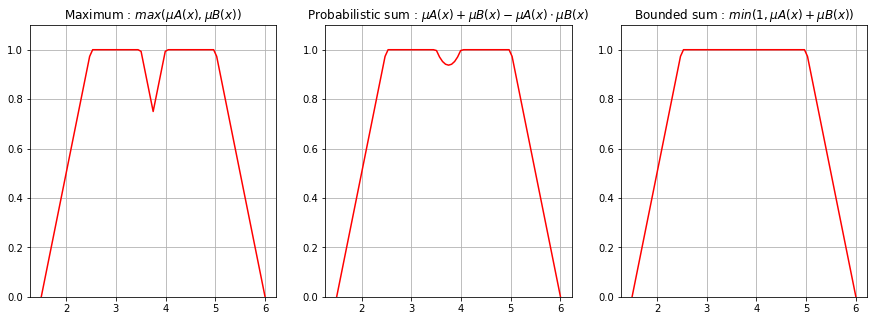

In [7]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

axarr[0].plot(in_values, np.maximum(mfA_fuzzified, mfB_fuzzified), c='r')
axarr[0].set_ylim(0, 1.1)
axarr[0].grid()
axarr[0].set_title('Maximum : $max(\mu A(x), \mu B(x))$')

axarr[1].plot(in_values, np.add(mfA_fuzzified, mfB_fuzzified) - np.multiply(mfA_fuzzified, mfB_fuzzified), c='r')
axarr[1].set_ylim(0, 1.1)
axarr[1].grid()
axarr[1].set_title('Probabilistic sum : $\mu A(x) + \mu B(x) - \mu A(x) \cdot \mu B(x)$')

axarr[2].plot(in_values,np.minimum(1, mfA_fuzzified + mfB_fuzzified), c='r')
axarr[2].set_ylim(0, 1.1)
axarr[2].grid()
axarr[2].set_title('Bounded sum : $min(1, \mu A(x) + \mu B(x))$')

plt.show()

## Fuzzy NOT

To compute the NOT condition you just take do $ mf_C = 1 - mf_A $. Obviously we can only do that because membership functions values are defined in [0, 1].

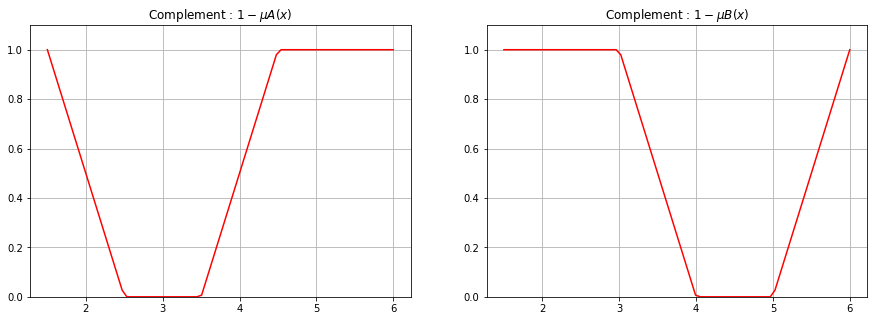

In [8]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

axarr[0].plot(in_values, np.subtract(1, mfA_fuzzified), c='r')
axarr[0].set_ylim(0, 1.1)
axarr[0].grid()
axarr[0].set_title('Complement : $1 - \mu A(x)$')

axarr[1].plot(in_values, np.subtract(1, mfB_fuzzified), c='r')
axarr[1].set_ylim(0, 1.1)
axarr[1].grid()
axarr[1].set_title('Complement : $1 - \mu B(x)$')

plt.show()

## 2D representation

The following example shows a 2D representation of the result of a fuzzy operation between two MFs.

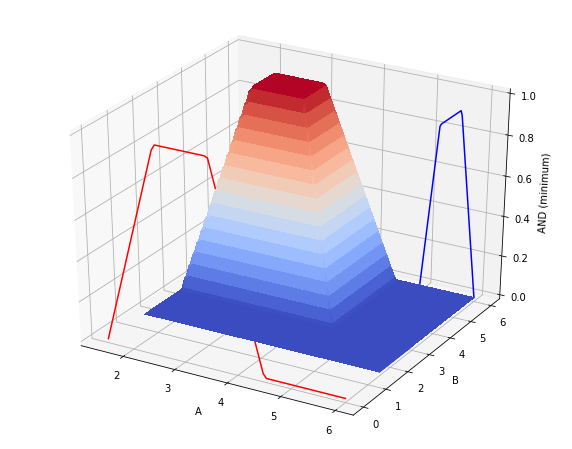

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

n = len(in_values)
X, Y = np.meshgrid(in_values, in_values)
membership_A_2D = np.tile(mfA_fuzzified, n).reshape(n,n)
membership_B_2D = np.tile(mfB_fuzzified, n).reshape(n,n).T
Z = np.minimum(membership_A_2D, membership_B_2D)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('AND (minimum)')

ax.plot(in_values, np.zeros(n), mfA_fuzzified, c='r')
ax.plot(max(in_values)*np.ones(n), in_values, mfB_fuzzified, c='b')

plt.show()